In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ***Betweenness Centrality***
--------------------

In [2]:
# This assumes that importance of nodes depends on them connecting other nodes.
# Distance between 2 nodes is the shortest path between them.

karate = nx.karate_club_graph()
karate = nx.convert_node_labels_to_integers(karate, first_label = 1)

In [3]:
list(nx.all_shortest_paths(karate, source = 34, target = 2))

[[34, 14, 2], [34, 20, 2], [34, 31, 2]]

In [4]:
# Note that nodes 14, 20 and 31 are in the shortest paths between nodes 34 and 2.

## ***Betweenness centrality***
# ***$C_{btw}(v) = \sum{_{s,t \in N}{\frac{\sigma_{s,t}{(v)}}{\sigma_{s,t}}}}$***

In [5]:
# Take two different nodes - s and t
# Find all the shortest paths between s and t -> sigma s,t
# Find all the shortest paths between s and t that contain node v -> sigma s,t (v)
# Betweenness centrality is the sum of this for all possible pairs of s and t in the network.

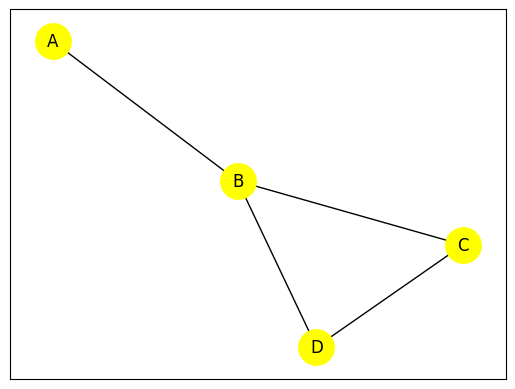

In [63]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D")])
nx.draw_networkx(graph, node_color = "yellow", node_size = 650)

# $C_{btw}(B) = \frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} + \frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} + \frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}}$

In [28]:
# s - > Source
# t -> Target
# s and t are aslo collectively called endpoints of a path
# This equation excludes the node B either as s or t.

(1 / 1) + (1 / 1) + (0 / 1)

2.0

In [29]:
# If we include node B;

In [30]:
{tuple(sorted(pair)) for pair in itertools.permutations(["A", "B", "C", "D"], r = 2)}

{('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')}

In [31]:
template = r"\frac{\sigma_{%s, %s}{(B)}}{\sigma_{%s, %s}} +"

for (node_1, node_2) in {tuple(sorted(pair)) for pair in itertools.permutations(["A", "B", "C", "D"], r = 2)}:
    print(template % (node_1, node_2, node_1, node_2))

\frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}} +
\frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
\frac{\sigma_{B, D}{(B)}}{\sigma_{B, D}} +
\frac{\sigma_{A, B}{(B)}}{\sigma_{A, B}} +
\frac{\sigma_{B, C}{(B)}}{\sigma_{B, C}} +
\frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} +


# $C_{btw}(B) = \frac{\sigma_{B, D}{(B)}}{\sigma_{B, D}} +
\frac{\sigma_{A, B}{(B)}}{\sigma_{A, B}} +
\frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} +
\frac{\sigma_{B, C}{(B)}}{\sigma_{B, C}} +
\frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
\frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}}$

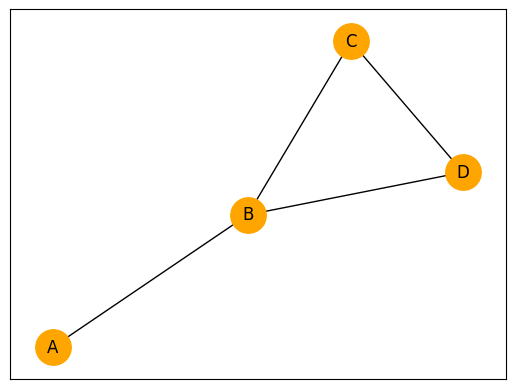

In [60]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D")])
nx.draw_networkx(graph, node_color = "orange", node_size = 650)

In [33]:
(1 / 1) + (1 / 1) + (1 / 1) + (1 / 1) + (1 / 1) + (0 / 1)

5.0

## ***Disconnected nodes***

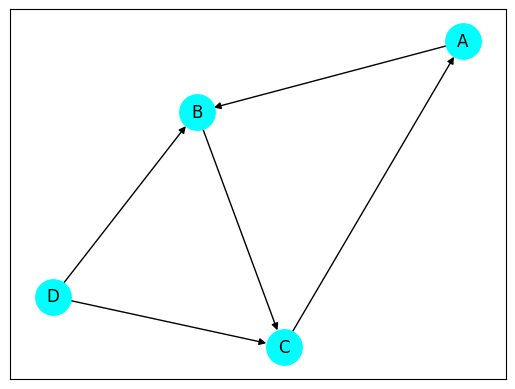

In [56]:
graph = nx.DiGraph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("D", "B"), ("D", "C"), ("C", "A")])
nx.draw_networkx(graph, node_color = "cyan", node_size = 650)

In [55]:
# Here node D cannot be reached by any other nodes!
# Hence, sigma(any, D) will be 0.

# In betweenness centrality only the pair of nodes that has at least one shortest path between them are considered.

In [36]:
# Betweenness centrality of B, excluding B as a node

# $C_{btw}(B) = \frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
                \frac{\sigma_{D, C}{(B)}}{\sigma_{D, C}} +
                \frac{\sigma_{C, A}{(B)}}{\sigma_{C, A}} +
                \frac{\sigma_{D, A}{(B)}}{\sigma_{D, A}}$

In [37]:
(1 / 1) + (0 / 1) + (0 / 1) + (0 / 1)

1.0

# $C_{btw}(C) = \frac{\sigma_{A, B}{(C)}}{\sigma_{A, B}} +
                \frac{\sigma_{D, B}{(C)}}{\sigma_{D, B}} +
                \frac{\sigma_{B, A}{(C)}}{\sigma_{B, A}} +
                \frac{\sigma_{D, A}{(C)}}{\sigma_{D, A}}$

In [38]:
(0 / 1) + (0 / 1) + (1 / 1) + (1 / 1)

2.0

### ***We did not discuss betweenness centrality of directed networks where the given node is also included.***

### **Normalization**

In [39]:
# Betweenness centrality will be larger in graphs with many nodes simply because in larger networks there are many pairs of 
# s and  t to choose from.
# To normalize this betweenness centrality is divided by the number of pairs of nodes in the graph 
# (excluding the node bc is being calculated for)

## **Total number of node pairs in a directed graph = $\frac{1}{2}(|N| - 1)(|N| - 2)$**
## **Total number of node pairs in an undirected graph = ${(|N| - 1)(|N| - 2)}$**

In [40]:
nx.betweenness_centrality(karate, normalized = False, endpoints = False)

{1: 231.0714285714286,
 2: 28.478571428571424,
 3: 75.85079365079366,
 4: 6.288095238095237,
 5: 0.3333333333333333,
 6: 15.833333333333334,
 7: 15.833333333333332,
 8: 0.0,
 9: 29.529365079365082,
 10: 0.44761904761904764,
 11: 0.3333333333333333,
 12: 0.0,
 13: 0.0,
 14: 24.215873015873015,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 17.1468253968254,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 9.299999999999999,
 25: 1.1666666666666665,
 26: 2.0277777777777777,
 27: 0.0,
 28: 11.79206349206349,
 29: 0.9476190476190476,
 30: 1.5428571428571427,
 31: 7.609523809523807,
 32: 73.00952380952378,
 33: 76.69047619047619,
 34: 160.5515873015873}

In [41]:
bckarate = nx.betweenness_centrality(karate, normalized = False, endpoints = False)
sorted(bckarate.items(), reverse = True, key = lambda item: item[1])

[(1, 231.0714285714286),
 (34, 160.5515873015873),
 (33, 76.69047619047619),
 (3, 75.85079365079366),
 (32, 73.00952380952378),
 (9, 29.529365079365082),
 (2, 28.478571428571424),
 (14, 24.215873015873015),
 (20, 17.1468253968254),
 (6, 15.833333333333334),
 (7, 15.833333333333332),
 (28, 11.79206349206349),
 (24, 9.299999999999999),
 (31, 7.609523809523807),
 (4, 6.288095238095237),
 (26, 2.0277777777777777),
 (30, 1.5428571428571427),
 (25, 1.1666666666666665),
 (29, 0.9476190476190476),
 (10, 0.44761904761904764),
 (5, 0.3333333333333333),
 (11, 0.3333333333333333),
 (8, 0.0),
 (12, 0.0),
 (13, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (27, 0.0)]

In [42]:
import operator

In [43]:
sorted(nx.betweenness_centrality(karate, normalized = False, endpoints = False).items(), reverse = True, key = operator.itemgetter(1))

[(1, 231.0714285714286),
 (34, 160.5515873015873),
 (33, 76.69047619047619),
 (3, 75.85079365079366),
 (32, 73.00952380952378),
 (9, 29.529365079365082),
 (2, 28.478571428571424),
 (14, 24.215873015873015),
 (20, 17.1468253968254),
 (6, 15.833333333333334),
 (7, 15.833333333333332),
 (28, 11.79206349206349),
 (24, 9.299999999999999),
 (31, 7.609523809523807),
 (4, 6.288095238095237),
 (26, 2.0277777777777777),
 (30, 1.5428571428571427),
 (25, 1.1666666666666665),
 (29, 0.9476190476190476),
 (10, 0.44761904761904764),
 (5, 0.3333333333333333),
 (11, 0.3333333333333333),
 (8, 0.0),
 (12, 0.0),
 (13, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (27, 0.0)]

In [44]:
karate.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34))

In [45]:
{tuple(sorted(pair)) for pair in itertools.permutations(karate.nodes(), r = 2)};

In [46]:
occurrance_in_spaths = {node: 0 for node in karate.nodes()}
knodes = karate.nodes()

# Inclusive :(
for (s, t) in {tuple(sorted(pair)) for pair in itertools.permutations(karate.nodes(), r = 2)}:
    for node in knodes:
        shortest_paths = nx.all_shortest_paths(karate, source = s, target = t)
        if shortest_paths:
            for spath in shortest_paths:
                if node in spath:
                    occurrance_in_spaths[node] += 1

In [47]:
occurrance_in_spaths

{1: 931,
 2: 205,
 3: 300,
 4: 76,
 5: 90,
 6: 174,
 7: 174,
 8: 71,
 9: 264,
 10: 49,
 11: 90,
 12: 88,
 13: 114,
 14: 209,
 15: 131,
 16: 131,
 17: 170,
 18: 140,
 19: 131,
 20: 178,
 21: 131,
 22: 140,
 23: 131,
 24: 186,
 25: 70,
 26: 85,
 27: 101,
 28: 92,
 29: 60,
 30: 135,
 31: 115,
 32: 343,
 33: 446,
 34: 723}

## ***Betweenness centrality can be really computationally intensive, particularly for large networks. $O(N^{3})$***

In [48]:
# So one can sample a subset of nodes to compute the betweenness centrality.
# Sample size = 10

nx.betweenness_centrality(karate, normalized = False, endpoints = False, k = 10)

{1: 203.66674603174602,
 2: 48.17880952380952,
 3: 63.76214285714286,
 4: 3.919444444444444,
 5: 0.0,
 6: 34.0,
 7: 34.0,
 8: 0.0,
 9: 29.284523809523805,
 10: 0.5261904761904762,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 21.730317460317462,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 10.390238095238095,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 4.93,
 25: 0.2833333333333333,
 26: 4.599444444444445,
 27: 0.0,
 28: 27.027301587301586,
 29: 1.3761904761904762,
 30: 1.9428571428571426,
 31: 6.549047619047618,
 32: 78.63444444444443,
 33: 78.08936507936508,
 34: 137.6096031746032}

In [49]:
# In another way one can selectively look at the occorrances of a given node in between a select pairs of (subsets) nodes.
# Here the sources will be 1 through 9 and targets will be 10 through 19

nx.betweenness_centrality_subset(karate, sources = range(1, 10), targets = range(10, 20), normalized = False)

{1: 22.458333333333332,
 2: 0.875,
 3: 7.448809523809524,
 4: 0.875,
 5: 0.16666666666666666,
 6: 1.6666666666666667,
 7: 2.0,
 8: 0.0,
 9: 1.7142857142857142,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 1.9071428571428568,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 1.1571428571428573,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.6000000000000001,
 32: 1.7142857142857142,
 33: 7.671428571428571,
 34: 6.245238095238095}

# ***Betweenness centrality of edges.***
------------------

In [64]:
# Betweenness centrality of an edge is calculated very similarly to the betweenness centrality of a node
# Number of shortest paths between s and t that involve the edge divided by the total number of shortest paths between s and t.

# ***$C_{btw}(e) = \sum{_{s,t \in N}{\frac{\sigma_{s, t}{(e)}}{\sigma_{s, t}}}}$***

In [67]:
sorted(nx.edge_betweenness_centrality(karate, normalized = True).items(), reverse = True, key = lambda items: items[1])

[((1, 32), 0.1272599949070537),
 ((1, 7), 0.07813428401663695),
 ((1, 6), 0.07813428401663694),
 ((1, 3), 0.0777876807288572),
 ((1, 9), 0.07423959482783014),
 ((3, 33), 0.06898678663384543),
 ((14, 34), 0.06782389723566191),
 ((20, 34), 0.05938233879410351),
 ((1, 12), 0.058823529411764705),
 ((27, 34), 0.0542908072319837),
 ((32, 34), 0.05339388280564752),
 ((1, 5), 0.0522875816993464),
 ((1, 11), 0.0522875816993464),
 ((1, 13), 0.04652406417112298),
 ((1, 20), 0.045936960642843),
 ((1, 14), 0.04237189825425121),
 ((26, 32), 0.04205783323430383),
 ((32, 33), 0.04143394731630026),
 ((3, 28), 0.04119203236850296),
 ((9, 34), 0.04043657867187279),
 ((1, 18), 0.04012392835922248),
 ((1, 22), 0.040123928359222474),
 ((25, 32), 0.040106951871657755),
 ((15, 34), 0.03473955238661121),
 ((16, 34), 0.03473955238661121),
 ((19, 34), 0.03473955238661121),
 ((21, 34), 0.03473955238661121),
 ((23, 34), 0.03473955238661121),
 ((24, 34), 0.03266983561101209),
 ((2, 31), 0.032280791104320514),
 ((3,

In [68]:
nx.betweenness_centrality_subset(karate, sources = range(1, 10), targets = range(30, 34), normalized = True)

{1: 0.014835858585858586,
 2: 0.004103535353535353,
 3: 0.005781024531024532,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.004554473304473304,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.001204004329004329,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0007305194805194804,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.00031565656565656563,
 30: 0.0,
 31: 0.0008522727272727273,
 32: 0.002344877344877345,
 33: 0.00579004329004329,
 34: 0.0039953102453102445}